# DOES SMOKING ADVERSELY AFFECT LUNG CAPACITY?

#### DONE BY:
##### 222BDA55 - JIBIN JOSEPH
##### 222BDA58 - TRIVENI THAPA
##### 222BDA62 - JOHN JEFFERSON

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [2]:
df = pd.read_excel('LungCap.xls')

In [4]:
df_lung=df

In [5]:
df_lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(cc)     725 non-null    float64
 1   Age( years)     725 non-null    int64  
 2   Height(inches)  725 non-null    float64
 3   Smoke           725 non-null    object 
 4   Gender          725 non-null    object 
 5   Caesarean       725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


There are columns with float64(2), int64(1), object(3). And there are no null items in the dataset

In [6]:
df_lung.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [7]:
df_lung.rename(columns={'LungCap(cc)':'Lungcap','Age( years)':'Age','Height(inches)':'Height'},inplace=True)

In [8]:
df_lung['Smoke'] = df_lung['Smoke'].map({'yes': 1, 'no': 0})

'Smoke' column is to have string values 'yes' and 'no' representing whether a person smokes or not. The dictionary {'yes': 1, 'no': 0} maps the string value 'yes' to 1 and the string value 'no' to 0.

In [9]:
df_lung.head()

,Lungcap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,male,no
1,10.125,18,74.7,1,female,no
2,9.550,16,69.7,0,female,yes
3,11.125,14,71.0,0,male,no
4,4.800,5,56.9,0,male,no


## Exploratory Data Analysis

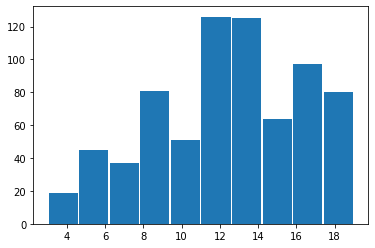

In [10]:
plt.hist(df['Age'],rwidth = 0.95)
plt.show()

The age-group of 11-14 is more in number in our dataset

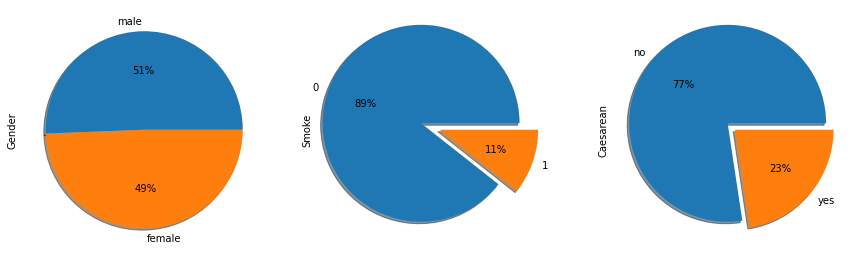

In [11]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
df_lung['Gender'].value_counts().plot.pie(explode = [0,0],autopct = '%1.0f%%',ax=axes[0],shadow = True)
df_lung['Smoke'].value_counts().plot.pie(explode = [0.2,0],autopct = '%1.0f%%',ax=axes[1],shadow = True)
df_lung['Caesarean'].value_counts().plot.pie(explode = [0.1,0],autopct = '%1.0f%%',ax=axes[2],shadow = True)
plt.show()

These graphs give percentage of different factors in our dataset.
Men are more than women,
Smokers are less when compared to Non-smokers.
People born by Caesarean are less compared with people not born by Caesarean

In [12]:
df_lung["Gender"].value_counts(normalize=True)*100

male      50.62069
female    49.37931
Name: Gender, dtype: float64

In [13]:
df_lung["Smoke"].value_counts(normalize=True)*100

0    89.37931
1    10.62069
Name: Smoke, dtype: float64

In [14]:
df_lung["Caesarean"].value_counts(normalize=True)*100

no     77.37931
yes    22.62069
Name: Caesarean, dtype: float64

Text(0.5, 0, 'Age')

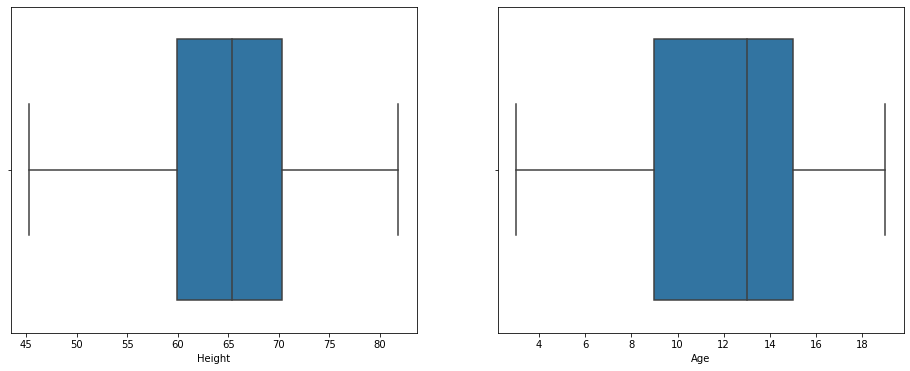

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='Height', data=df_lung, ax=axes[0])
axes[0].set_xlabel('Height')

sns.boxplot(x='Age', data=df_lung, ax=axes[1])
axes[1].set_xlabel('Age')

The height ranges from 45 to 82 inches with a median value of 65 inches.
The Age ranges from 3 to 19

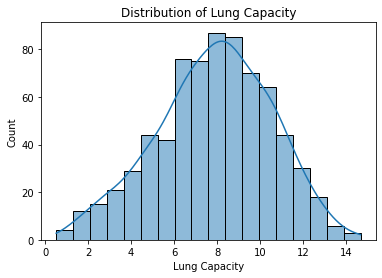

In [16]:
# To check the distribution of lung capacity
sns.histplot(df_lung['Lungcap'], kde=True)
plt.xlabel('Lung Capacity')
plt.ylabel('Count')
plt.title('Distribution of Lung Capacity')
plt.show()

In [17]:
df['Lungcap'].value_counts()

8.350     8
8.000     7
7.825     7
8.775     7
6.450     7
         ..
3.025     1
5.475     1
7.150     1
12.200    1
3.850     1
Name: Lungcap, Length: 342, dtype: int64

This graph shows a normally distributed curve of the Lung Capacity of the people in our dataset. 

C:\Users\JIBIN JOSEPH\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


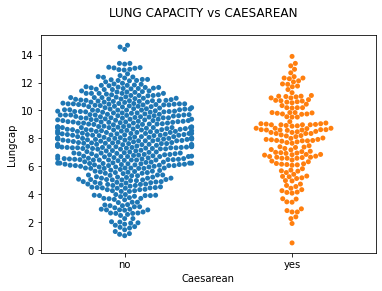

In [18]:
sns.swarmplot(y='Lungcap',data=df_lung,x='Caesarean')
plt.suptitle('LUNG CAPACITY vs CAESAREAN')
plt.show()

In this plot, we can clearly observe that the people not born by caesarean was more and has more lung capacities b/w 6 cc and 11 cc. 
People born by caesarean has more lung capacities of 7 cc and b/w 8 & 10 cc.

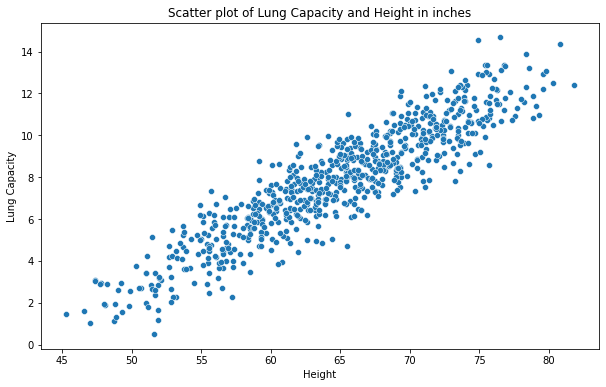

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Height', y='Lungcap', data=df_lung)
plt.title('Scatter plot of Lung Capacity and Height in inches')
plt.xlabel('Height')
plt.ylabel('Lung Capacity')
plt.show()


From this graph, We can infer that Lung capacity increases with height.

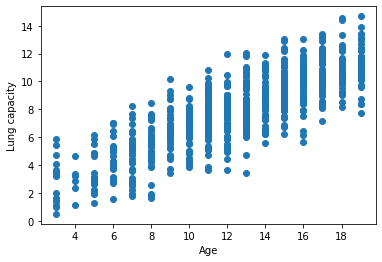

In [20]:
plt.scatter(df_lung['Age'], df_lung['Lungcap'])
plt.xlabel('Age')
plt.ylabel('Lung capacity')
plt.show()

The scatter plot gives the measure of varying lung capacities with respect to the Age. Lung Capacity has shown increase with age

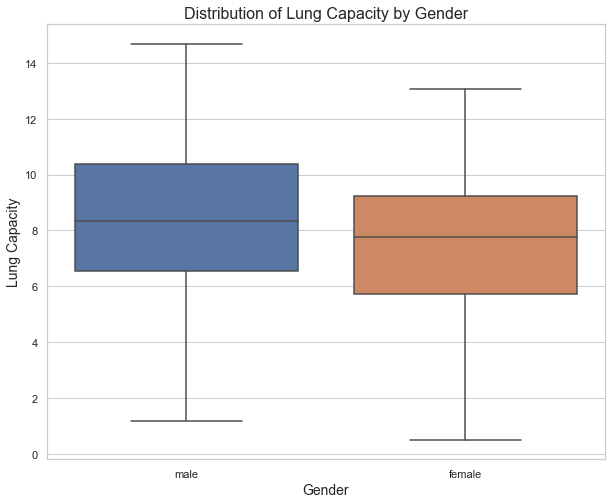

In [21]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Gender', y='Lungcap', data=df_lung, ax=ax)
ax.set_xlabel("Gender",fontsize=14)
ax.set_ylabel("Lung Capacity",fontsize=14)
ax.set_title("Distribution of Lung Capacity by Gender",fontsize=16)
plt.show()


The graph depicts that the range of lung capacities for men is slightly higher than females

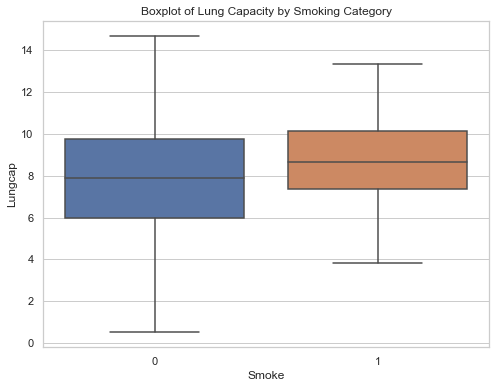

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Smoke', y='Lungcap', data=df_lung)
plt.title('Boxplot of Lung Capacity by Smoking Category')
plt.show()


The graph depicts that lung capacities of the non-smokers is more than the smokers

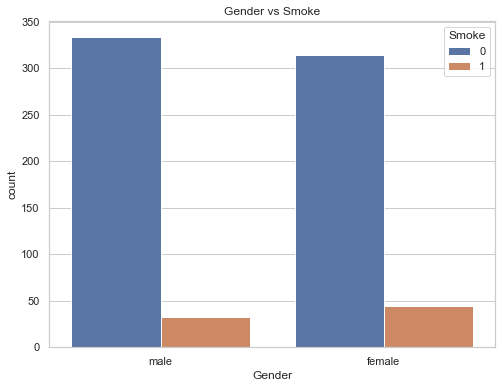

In [23]:
#To check number of smoker gender wise against the population

fig=plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=df_lung,hue='Smoke')
plt.title('Gender vs Smoke')
plt.show()

With respect to smoking we see that there is more number of female smokers than male smokers 

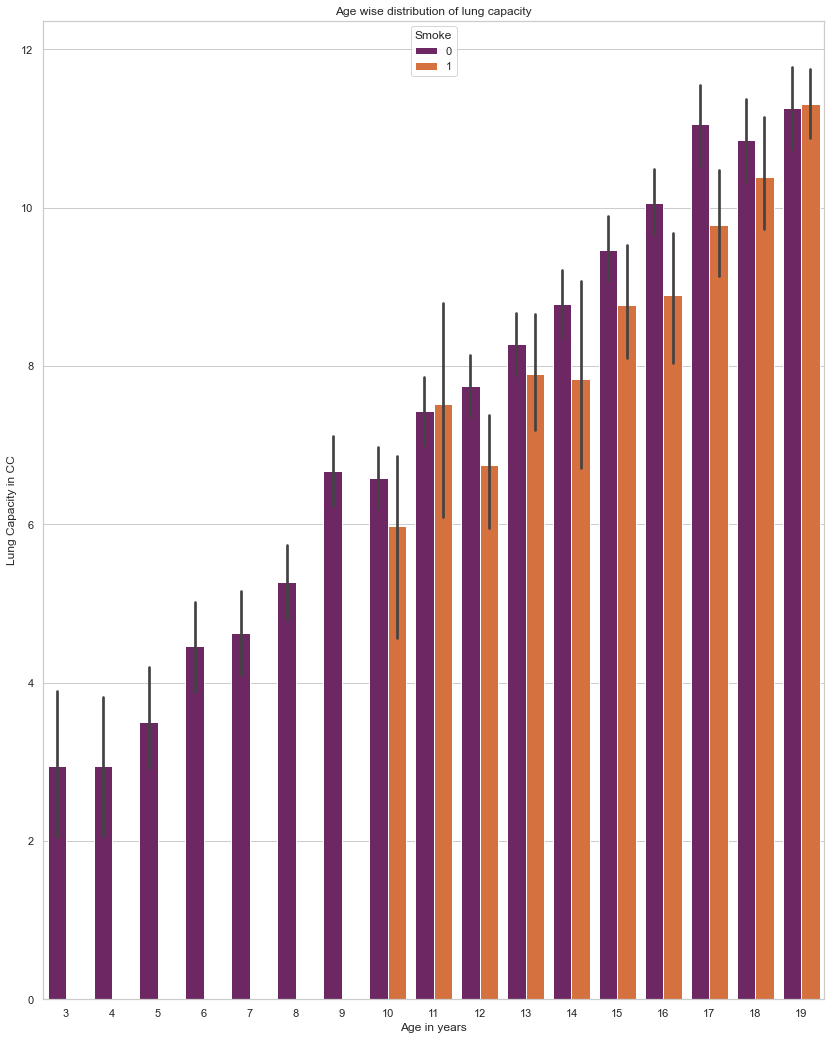

In [24]:
#To determine the agewise distribution of lung cap for smokers and non-smokers
f,ax=plt.subplots(figsize=(14,18))
sns.barplot(x='Age',y='Lungcap',hue='Smoke',data=df_lung,palette='inferno')
plt.title('Age wise distribution of lung capacity')
plt.xlabel('Age in years')
plt.ylabel('Lung Capacity in CC')
plt.show()

The graph indicates the average Lung Capacity of people increases linearly with respect to Age. The violet bar shows the no of non smokers and the orange bar shows the no of smokers. Graph also shows that people of Age less than 10 do not smoke.

In [25]:
# As we know from the bar graph that people starts smoking only after the age of 10,
# so to get better understanding of fluctuation we will compare adults only from the age of 10
df_adult=df_lung[df_lung['Age']>9] 

df_smoke=df_adult.groupby('Smoke').mean()['Lungcap']
df_smoke

Smoke
0    8.891524
1    8.645455
Name: Lungcap, dtype: float64

In [26]:
diff_smoke=df_smoke[0]-df_smoke[1]
print('The average difference between the lung capacity of smoker and non-smoker is ',round(diff_smoke,3))

The average difference between the lung capacity of smoker and non-smoker is  0.246


Text(0.5, 1.0, 'Violin of Lung Capacity by Smoking')

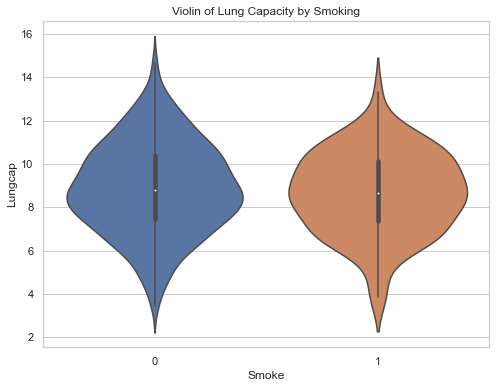

In [28]:
fig,axes=plt.subplots(figsize=(8,6))
import seaborn as sns

sns.violinplot(x='Smoke', y='Lungcap', data=df_adult)

plt.title('Violin of Lung Capacity by Smoking')

In the case of "Lung Capacity by Smoking", a violin plot can be used to compare the distribution of lung capacity measurements between people who smoke and those who don't smoke.

In [29]:
#creating two datasets on the basis of smokers and non smokers

In [30]:
smokers = df_adult[df_adult['Smoke'] == 1]
non_smokers = df_adult[df_adult['Smoke'] == 0]

In [31]:
smokers.describe()

,Lungcap,Age,Height,Smoke
count,77.000000,77.000000,77.000000,77.0
mean,8.645455,14.779221,68.522078,1.0
std,1.882894,2.633905,5.249251,0.0
min,3.850000,10.000000,58.000000,1.0
25%,7.350000,13.000000,64.700000,1.0
50%,8.650000,15.000000,69.000000,1.0
75%,10.125000,17.000000,72.600000,1.0
max,13.325000,19.000000,78.900000,1.0


In [32]:
non_smokers.describe()

,Lungcap,Age,Height,Smoke
count,466.000000,466.000000,466.000000,466.0
mean,8.891524,14.032189,67.487768,0.0
std,2.099260,2.697875,5.509679,0.0
min,3.450000,10.000000,51.500000,0.0
25%,7.456250,12.000000,63.400000,0.0
50%,8.787500,14.000000,67.500000,0.0
75%,10.400000,16.000000,71.475000,0.0
max,14.675000,19.000000,81.800000,0.0


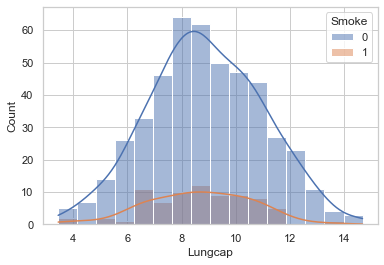

In [33]:
sns.histplot(data=df_adult, x='Lungcap', hue='Smoke', kde=True)
plt.show()

In [34]:
df_smoke=df_adult.groupby('Smoke').mean()['Lungcap']
diff_smoke=df_smoke[0]-df_smoke[1]

print('The average difference between the lung capacity of smoker and non-smoker is ',round(diff_smoke,3))

The average difference between the lung capacity of smoker and non-smoker is  0.246


<AxesSubplot:>

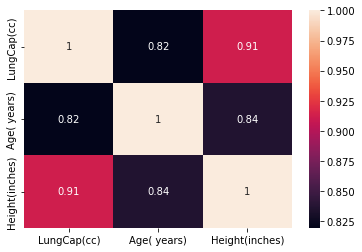

In [3]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [35]:
smokers['Lungcap'].mean()

8.645454545454546

In [36]:
non_smokers['Lungcap'].mean()

8.891523605150212

In [37]:
df_subset = df_lung[['Smoke', 'Lungcap']]

### Performing T Test

In [38]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_subset.loc[df_subset['Smoke'] == 1, 'Lungcap'],
                             df_subset.loc[df_subset['Smoke'] == 0, 'Lungcap'])
print('T-test result:', 't =', t_stat, ', p =', p_value)
if p_value < 0.05:
    print('The difference in mean lung capacity between smokers and non-smokers is statistically significant.')
else:
    print('There is no statistically significant difference in mean lung capacity between smokers and non-smokers.')

T-test result: t = 2.739918298617243 , p = 0.0062969933279543875
The difference in mean lung capacity between smokers and non-smokers is statistically significant.


The t-value measures the size of the difference between the two means relative to the variation in the data. In this case, a positive t-value indicates that the mean lung capacity of smokers is lower than the mean lung capacity of non-smokers.

The p-value is the probability of observing a t-value as extreme or more extreme than the one observed, assuming that there is no real difference between the means of the two groups. In this case, the small p-value of 0.0062969933279543875 suggests that the observed difference in mean lung capacity between smokers and non-smokers is statistically significant at the 5% significance level. This means that we can reject the null hypothesis and conclude that there is a significant difference in mean lung capacity between smokers and non-smokers.

### Modelling the Data

In [39]:
from sklearn.linear_model import LinearRegression

# Separate the independent variables and the dependent variable
X = df_adult[['Age', 'Height', 'Smoke']]
y = df_adult['Lungcap']

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Print the coefficients of the model
print('Coefficients:', model.coef_)

# Print the intercept of the model
print('Intercept:', model.intercept_)

Coefficients: [ 0.14767402  0.27038112 -0.63604408]
Intercept: -11.428084461124886


The coefficient values represent the change in lung capacity per unit change in each independent variable, holding the other variables constant. Specifically, for a one-unit increase in age, there is a 0.1477 increase in lung capacity. Similarly, for a one-unit increase in height, there is a 0.2704 increase in lung capacity, and for smokers, there is a 0.6360 decrease in lung capacity compared to non-smokers.

The intercept value is the predicted lung capacity when all independent variables are equal to zero, which is not practically meaningful in this case since it is impossible to have age, height, and smoking status equal to zero.

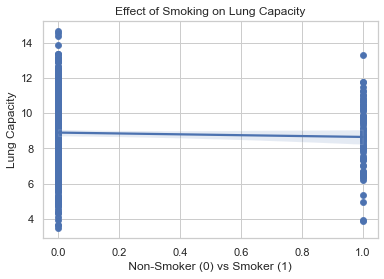

In [40]:
sns.scatterplot(x='Smoke', y='Lungcap', data=df_adult)
sns.regplot(x='Smoke', y='Lungcap', data=df_adult)
plt.title('Effect of Smoking on Lung Capacity')
plt.xlabel(' Non-Smoker (0) vs Smoker (1) ')
plt.ylabel('Lung Capacity')
plt.show()

The Graphical Representation proving our results. 

In [41]:
import statsmodels.api as sm

# encode categorical variables as binary
df_lung['Gender'] = pd.get_dummies(df_lung['Gender'], drop_first=True)
df_lung['Smoke'] = pd.get_dummies(df_lung['Smoke'], drop_first=True)
df_lung['Caesarean'] = pd.get_dummies(df_lung['Caesarean'], drop_first=True)

# define independent and dependent variables
X = df_lung[['Smoke', 'Height', 'Age', 'Caesarean', 'Gender']]
y = df_lung['Lungcap']

# fit linear regression model
model = sm.OLS(y, X).fit()

# print summary statistics of the model
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                Lungcap   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              5189.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:35:05   Log-Likelihood:                         -1253.8
No. Observations:                 725   AIC:                                      2518.
Df Residuals:                     720   BIC:                                      2541.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The R-squared value of 0.973 indicates that the model explains 97.3% of the variance in the dependent variable. This suggests that the model is a good fit for the data.

The coefficients for the independent variables represent the change in the dependent variable associated with a one-unit increase in the corresponding independent variable, holding all other independent variables constant. For example, the coefficient for Smoke is -0.5007, which indicates that smokers have, on average, 0.5007 lower lung capacity than non-smokers, holding all other variables constant.

The p-values for each coefficient indicate the statistical significance of each independent variable. A p-value less than 0.05 is typically considered statistically significant, which means that the associated independent variable has a significant effect on the dependent variable. In this case, Smoke, Height, Age, and Gender are all statistically significant, while Caesarean is marginally significant with a p-value of 0.055.

The output also includes other statistics, such as the F-statistic and AIC, which provide information about the overall goodness of fit of the model.

R-squared: This is a measure of how well the model fits the data. It ranges from 0 to 1, with higher values indicating a better fit. In this case, the R-squared value is 0.973, which indicates that the model explains 97.3% of the variance in the dependent variable.

Adjusted R-squared: This is a modified version of the R-squared value that takes into account the number of independent variables in the model. It adjusts the R-squared value downward as more independent variables are added to the model. In this case, the adjusted R-squared value is also 0.973, which indicates that the model is a good fit for the data.

F-statistic: This is a measure of how well the overall model fits the data. It compares the variance explained by the model to the variance not explained by the model. Higher values indicate a better overall fit. In this case, the F-statistic is 5189, which is very high and indicates a strong overall fit.

Prob (F-statistic): This is the p-value associated with the F-statistic. It tells us the probability of observing an F-statistic as large or larger than the one we calculated, assuming that the null hypothesis (that all of the independent variables are equal to zero) is true. In this case, the p-value is very low (0.00), which indicates that we can reject the null hypothesis and conclude that the independent variables are significantly related to the dependent variable.

Coefficients: These are the estimated coefficients for each independent variable in the model. They tell us how much the dependent variable is expected to change for each one-unit increase in the corresponding independent variable, holding all other variables constant. In this case, we can see that Smoke, Caesarean, and Height have negative coefficients, indicating that they are negatively associated with Lungcap, while Age and Gender have positive coefficients, indicating that they are positively associated with Lungcap.

Std err: These are the standard errors associated with each coefficient estimate. They tell us how much variability there is in the estimated coefficients due to random sampling.

t-value: These are the t-values associated with each coefficient estimate. They tell us how many standard errors away from zero the coefficient estimate is. Higher absolute values indicate stronger evidence against the null hypothesis that the coefficient is equal to zero. In this case, we can see that all of the t-values are greater than 1.96 in absolute value, which means that all of the coefficients are significantly different from zero at the 5% level of significance.

P>|t|: These are the p-values associated with each t-value. They tell us the probability of observing a t-value as large or larger than the one we calculated, assuming that the null hypothesis (that the corresponding coefficient is equal to zero) is true. In this case, we can see that Smoke, Height, Age, and Gender all have very low p-values (less than 0.05), indicating that we can reject the null hypothesis and conclude that these coefficients are significantly different from zero at the 5% level of significance. Caesarean has a p-value of 0.055, which is slightly above the 0.05 threshold, indicating that we cannot conclusively reject the null hypothesis for this coefficient at the 5% level of significance.

Additionally, the F-statistic measures the overall significance of the model, which tests the null hypothesis that all the coefficients in the model are zero. In this case, the F-statistic is 5189 with a probability of 0.00, which suggests that the model is significant.

The coefficient estimates for each independent variable represent the expected change in the dependent variable (Lungcap) associated with a one-unit change in the respective independent variable, holding all other variables constant. For example, the estimated coefficient for Height is 0.0317, which means that for every one unit increase in Height, we expect Lungcap to increase by 0.0317 units, holding all other variables constant.

The P-values associated with each coefficient indicate the probability of observing the coefficient value if the null hypothesis is true (i.e., the true coefficient is zero). In general, smaller P-values (e.g., less than 0.05) indicate stronger evidence against the null hypothesis and suggest that the coefficient is significantly different from zero.

In this case, all variables except for Caesarean have P-values less than 0.05, which suggests that they are significantly associated with Lungcap. The coefficient for Caesarean has a P-value of 0.055, which suggests that the evidence against the null hypothesis is not very strong, but it is close to being significant.